In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [104]:
path = os.path.join(os.getcwd(),"..", "data", "dcmTransfer", "spu2_6.dcmTileCoords")

spu1_3 = pd.read_csv(path, names=["x","y","intensity"], sep="  | ", index_col=False, engine="python")
spu1_3_length = spu1_3.max()
spu1_3_min = spu1_3.min()
print(spu1_3_min)


spu1_3_x_length = int(spu1_3_length["x"]/2)
spu1_3_y_length = int(spu1_3_length["y"])

image = np.zeros((spu1_3_x_length , spu1_3_y_length))

for entry in spu1_3.itertuples():
    index_x = int(entry[1]/2) -1
    index_y = int(entry[2]) -1
    #print(image.shape)
    if entry[3] > 20:
        continue
    image[index_x, index_y] = entry[3]

x            1.0
y            0.0
intensity   -1.0
dtype: float64


In [105]:
image.shape
image[ 0, 4]

0.874771

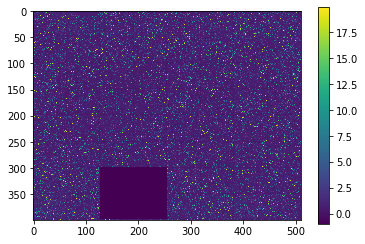

In [107]:
plt.figure()
c = plt.imshow(image, cmap='viridis', interpolation="nearest")
plt.colorbar(c)


In [92]:
spu1_3_x_length

399

In [93]:
spu1_3.describe()

x              y      intensity
count  204800.000000  204800.000000  204800.000000
mean      399.500000     255.500000       2.697026
std       230.886358     147.801748       7.257052
min         1.000000       0.000000      -1.000000
25%       200.250000     127.750000       0.576554
50%       399.500000     255.500000       0.725662
75%       598.750000     383.250000       1.282330
max       798.000000     511.000000      97.537000

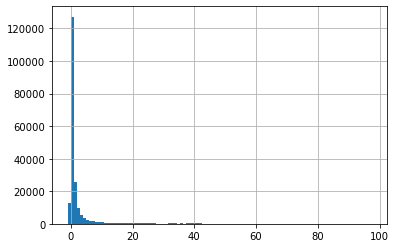

In [94]:
plt.figure()
spu1_3["intensity"].hist(bins=100)
plt.show()

In [87]:
spu1_3_clean = spu1_3.drop(spu1_3[spu1_3.intensity > 10].index)

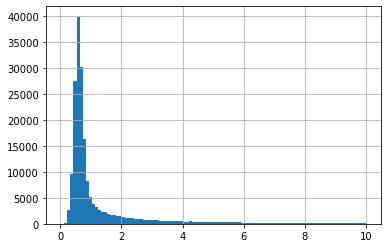

In [88]:
plt.figure()
spu1_3_clean["intensity"].hist(bins=100)
plt.show()